<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/CH13_Empolyee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 資料檔: [HR_comma_sep.csv](https://drive.google.com/file/d/1woPPyuYsfDxegFWiBzx7occ6y6iYTou7/view?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [4]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [5]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [6]:
# ch13-6
size = df['left'].value_counts()
pct = df['left'].value_counts(normalize=True).round(2)
pd.DataFrame(zip(size, pct), columns=['次數', '百分比'])

,次數,百分比
0,11428,0.76
1,3571,0.24


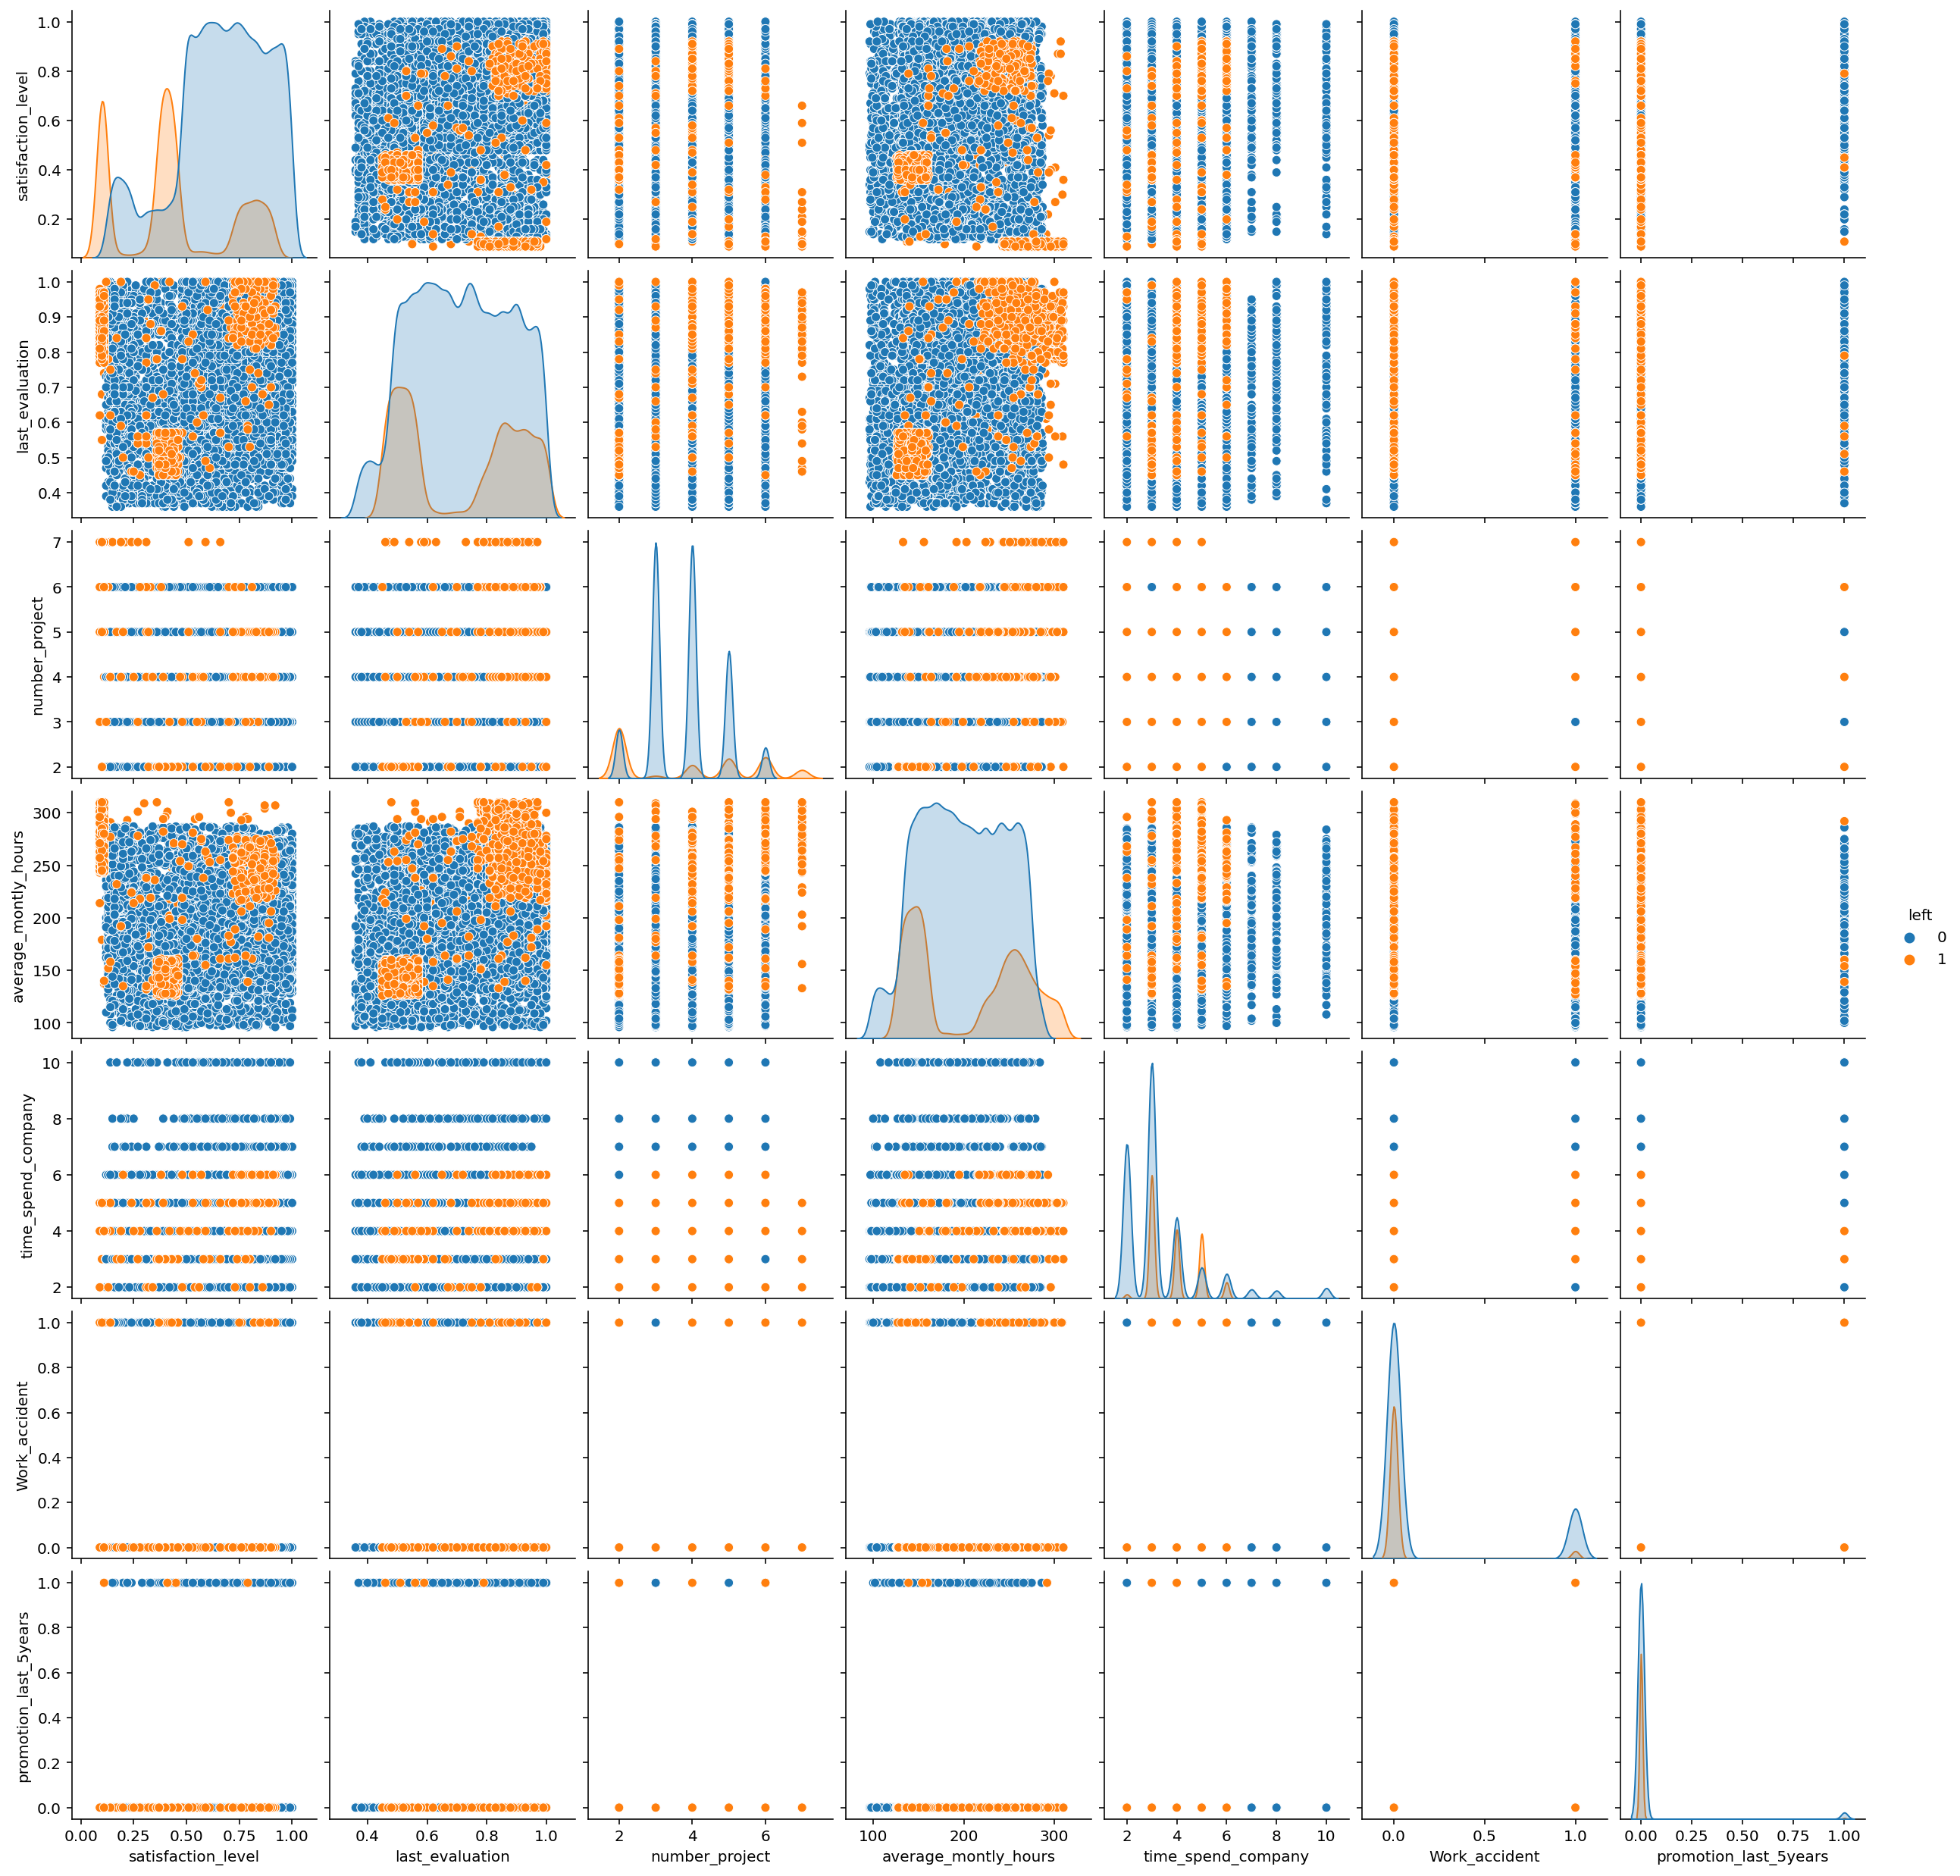

In [7]:
sns.pairplot(df, hue='left', diag_kws={'bw':0.1});

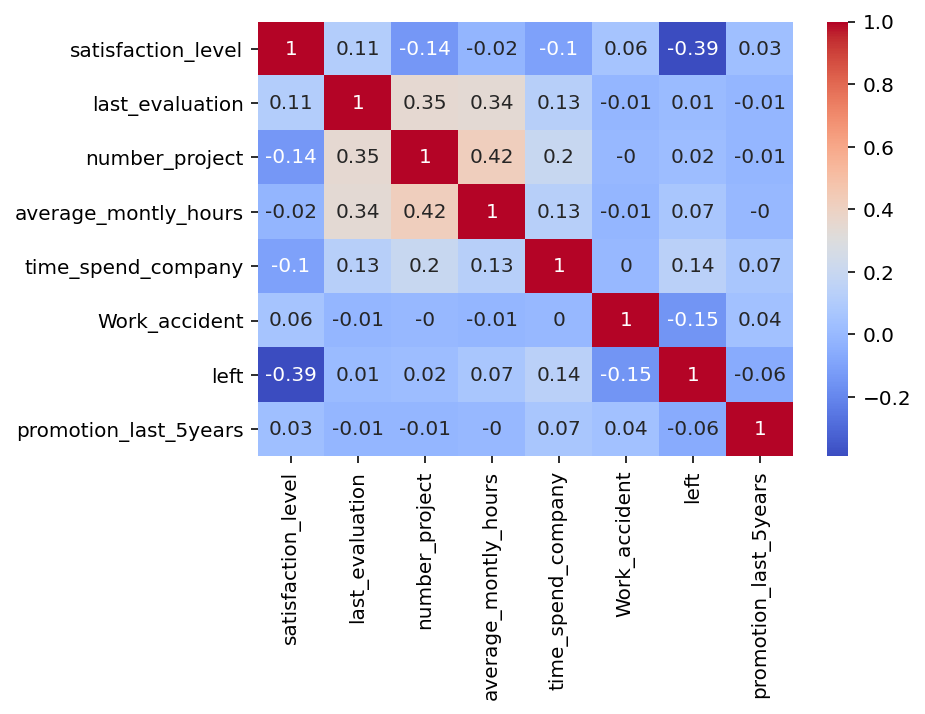

In [8]:
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm');

In [9]:
df.drop('left', axis=1).corrwith(df['left']).round(2)

satisfaction_level      -0.39
last_evaluation          0.01
number_project           0.02
average_montly_hours     0.07
time_spend_company       0.14
Work_accident           -0.15
promotion_last_5years   -0.06
dtype: float64

In [10]:
# ch13-10
df_left_salary = df.groupby(['left','salary']).size().unstack(1)
df_left_salary = df_left_salary[['low', 'medium', 'high']]
df_left_salary

salary,low,medium,high
left,,,
0,5144,5129,1155
1,2172,1317,82


In [11]:
df_left_salary/df_left_salary.sum()

salary,low,medium,high
left,,,
0,0.703116,0.795687,0.933711
1,0.296884,0.204313,0.066289


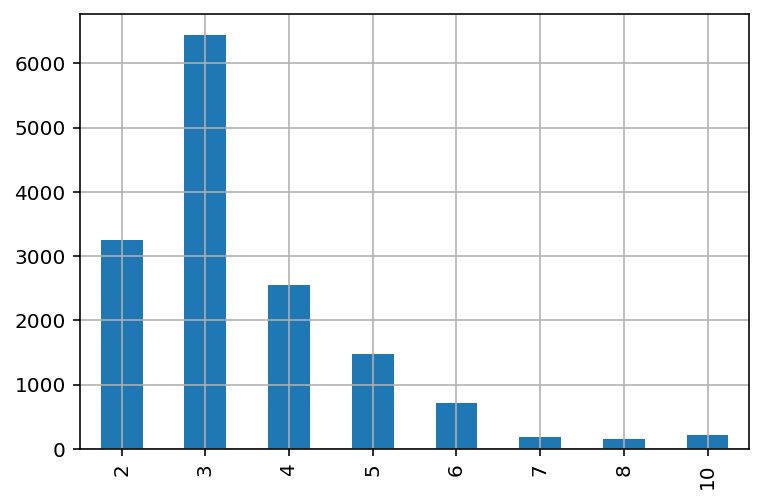

In [12]:
df['time_spend_company'].value_counts().sort_index().\
plot(kind='bar', grid=True);

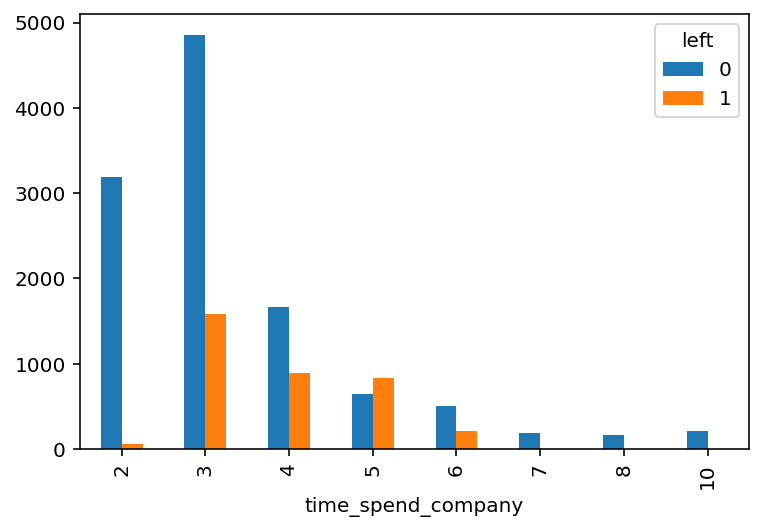

In [13]:
# ch13-13
df_left_time = df.groupby(['left','time_spend_company']).size().unstack(0)
df_left_time.plot(kind='bar');

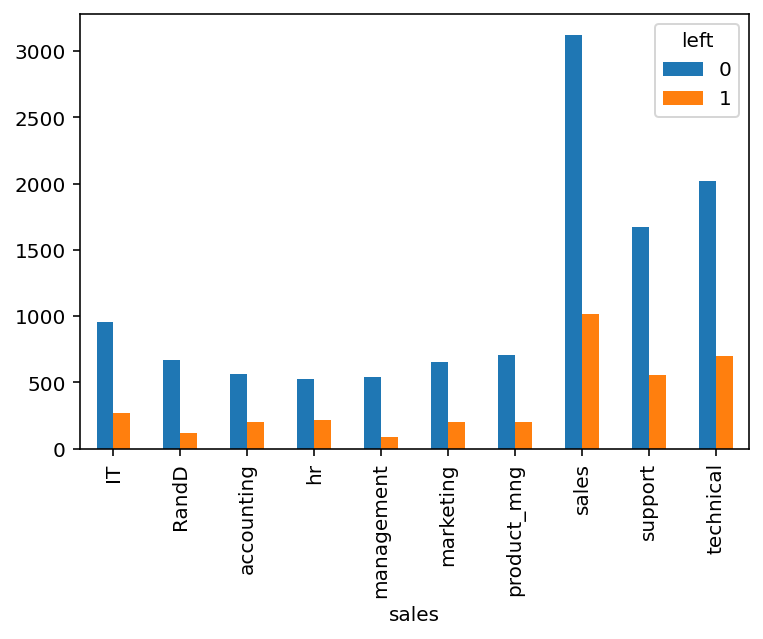

In [14]:
df.groupby(['left','sales']).size().unstack(0).plot(kind='bar');

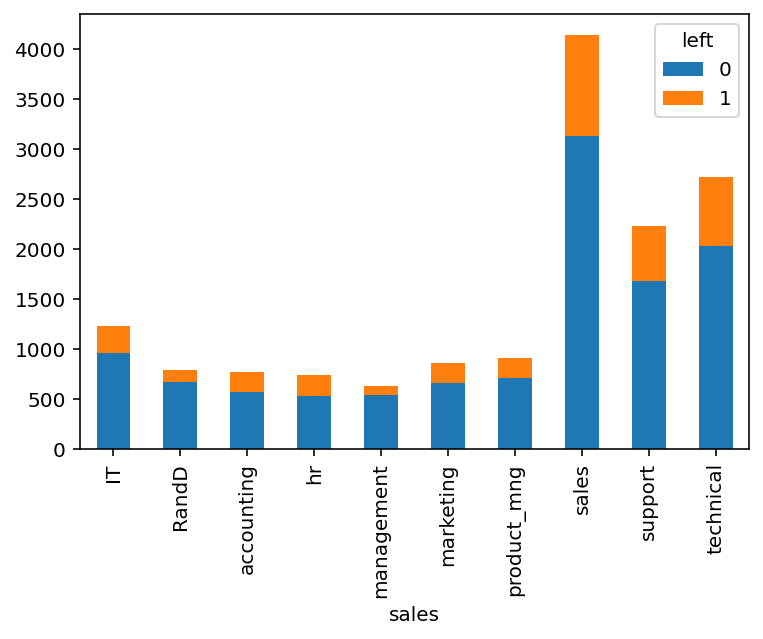

In [15]:
df.groupby(['left','sales']).size().unstack(0).plot(kind='bar', stacked=True);